##### Imports

In [1]:
from scripts.merge_data import *
from scripts.plotting import *

## Real users data

### PANDORA user profiles

In [2]:
# users profiles' dataset
df_prf = pd.read_csv("../original_data/pandora/profiles.csv", encoding = "utf-8")

In [3]:
print(f"Shape of the original profiles dataset:\n{df_prf.shape}\n")
print(f"Features:\n{df_prf.columns.to_numpy()}")
# show dataset
df_prf.head(3)

Shape of the original profiles dataset:
(10295, 38)

Features:
['author' 'mbti' 'introverted' 'intuitive' 'thinking' 'perceiving'
 'gender' 'age' 'enneagram' 'country' 'state' 'type' 'agreeableness'
 'openness' 'conscientiousness' 'extraversion' 'neuroticism'
 'is_description' 'is_percentile' 'is_score' 'contains_details'
 'num_comments' 'en_comments' 'en_comments_percentage' 'region'
 'continent' 'country_code' 'enneagram_type' 'enneagram_wing'
 'is_native_english_country' 'predicted_test' 'test_name' 'test_scale'
 '16pers_ta' 'test_result_type' 'is_female' 'is_female_pred'
 'is_female_proba']


,author,mbti,introverted,intuitive,thinking,perceiving,gender,age,enneagram,country,state,type,agreeableness,openness,conscientiousness,extraversion,neuroticism,is_description,is_percentile,is_score,contains_details,num_comments,en_comments,en_comments_percentage,region,continent,country_code,enneagram_type,enneagram_wing,is_native_english_country,predicted_test,test_name,test_scale,16pers_ta,test_result_type,is_female,is_female_pred,is_female_proba
0,-Afrodisiac-,intp,1.0,1.0,1.0,1.0,m,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,670,649,96.865672,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1,0.531728
1,-Areopagan-,NaN,NaN,NaN,NaN,NaN,m,NaN,NaN,NaN,NaN,percentiles,0.0,99.0,96.0,60.0,1.0,NaN,NaN,1.0,1.0,5,5,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,understand myself,percentiles,NaN,percentiles,0.0,0,0.162758
2,-Automaticity,entp,0.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,265,264,99.622642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.013042


In [4]:
df_prf["perceiving"].unique()

array([ 1., nan,  0.])

In [5]:
df_prf["enneagram_type"].unique()

array([nan,  3.,  5.,  9.,  1.,  8.,  7.,  4.,  6.,  2.])

#### Big Five model
Keep only authors with information about OCEAN

In [6]:
# OCEAN features we are interested in preserving
ocean = ["openness", "conscientiousness", "extraversion", "agreeableness", "neuroticism"]

# authors for which we have information about OCEAN
df_ocean = df_prf[df_prf["openness"].notna() & 
                  df_prf["conscientiousness"].notna() & 
                  df_prf["extraversion"].notna() & 
                  df_prf["agreeableness"].notna() & 
                  df_prf["neuroticism"].notna()]

print(f"Shape of dataset with OCEAN values:\n{df_ocean.shape}")
df_ocean.head(3)

Shape of dataset with OCEAN values:
(1568, 38)


,author,mbti,introverted,intuitive,thinking,perceiving,gender,age,enneagram,country,state,type,agreeableness,openness,conscientiousness,extraversion,neuroticism,is_description,is_percentile,is_score,contains_details,num_comments,en_comments,en_comments_percentage,region,continent,country_code,enneagram_type,enneagram_wing,is_native_english_country,predicted_test,test_name,test_scale,16pers_ta,test_result_type,is_female,is_female_pred,is_female_proba
1,-Areopagan-,NaN,NaN,NaN,NaN,NaN,m,NaN,NaN,NaN,NaN,percentiles,0.0,99.0,96.0,60.0,1.0,NaN,NaN,1.0,1.0,5,5,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,understand myself,percentiles,NaN,percentiles,0.0,0,0.162758
6,-BigSexy-,NaN,NaN,NaN,NaN,NaN,m,23.0,NaN,NaN,NaN,percentiles,39.0,92.0,1.0,18.0,4.0,NaN,1,NaN,1.0,2797,2655,94.923132,NaN,NaN,NaN,NaN,NaN,NaN,0.0,understand myself,percentiles,NaN,percentiles,0.0,0,0.034609
7,-BlitzN9ne,entp,0.0,1.0,1.0,1.0,m,21.0,3w4,NaN,NaN,description,50.0,85.0,15.0,50.0,30.0,1.0,NaN,NaN,NaN,3404,3042,89.365452,NaN,NaN,NaN,3.0,4.0,NaN,1.0,qualtrics,percentiles,NaN,description,0.0,0,0.027725


Exploring features

In [8]:
# missing values for some features
other_feats = ["gender", "age", "country", "mbti", "state", "is_description", "is_female_proba", "continent", 'introverted', 'intuitive', 'thinking', 'perceiving']
other_feats = df_ocean.columns.to_list()
print(f"Missing values for some features:\n{df_ocean[other_feats].isna().sum()/len(df_ocean)}\n")

# distinct values for some features
discr_feats = ["gender", "age", "country", "mbti", "state"]
print("Distinct values for some features:")
for c in discr_feats:
    print(f"{c}: {df_ocean[c].unique()}")

Missing values for some features:
author                       0.000000
mbti                         0.749362
introverted                  0.753189
intuitive                    0.749362
thinking                     0.751276
perceiving                   0.755740
gender                       0.608418
age                          0.593112
enneagram                    0.959184
country                      0.850128
state                        0.949617
type                         0.000000
agreeableness                0.000000
openness                     0.000000
conscientiousness            0.000000
extraversion                 0.000000
neuroticism                  0.000000
is_description               0.908163
is_percentile                0.765306
is_score                     0.322704
contains_details             0.139031
num_comments                 0.000000
en_comments                  0.000000
en_comments_percentage       0.000000
region                       0.952806
continent       

In [9]:
# comparing gender with female probability
df_ocean[["gender", "is_female_proba"]]

,gender,is_female_proba
1,m,0.162758
6,m,0.034609
7,m,0.027725
8,m,0.065021
23,f,0.952166
...,...,...
10290,m,0.230889
10291,f,0.548157
10292,NaN,0.590424
10293,NaN,0.215797


Feature selection

In [16]:
# features to keep
feats = ["author", "gender", "is_female_proba", "age"] + ocean
print(f"Features to keep (OCEAN and demographic):\n{feats}")

# OCEAN dataset
df_ocean = df_ocean.loc[:, feats].copy()

# reset the indices starting from 0
df_ocean = df_ocean.reset_index(drop = True)
print(f"Shape of OCEAN profile dataset:\n{df_ocean.shape}")
df_ocean.head(3)

Features to keep (OCEAN and demographic):
['author', 'gender', 'is_female_proba', 'age', 'openness', 'conscientiousness', 'extraversion', 'agreeableness', 'neuroticism']
Shape of OCEAN profile dataset:
(1568, 9)


,author,gender,is_female_proba,age,openness,conscientiousness,extraversion,agreeableness,neuroticism
0,-Areopagan-,m,0.162758,NaN,99.0,96.0,60.0,0.0,1.0
1,-BigSexy-,m,0.034609,23.0,92.0,1.0,18.0,39.0,4.0
2,-BlitzN9ne,m,0.027725,21.0,85.0,15.0,50.0,50.0,30.0


In [14]:
df_ocean["age"].max()

64.0

Missing values

In [18]:
# check for number of missing values for each feature
df_ocean.isna().sum()

author                 0
gender               954
is_female_proba        0
age                  930
openness               0
conscientiousness      0
extraversion           0
agreeableness          0
neuroticism            0
dtype: int64

Imputation of gender information

In [19]:
# if is_female_proba > thr, return f
# if is_female_proba < 1-thr, return m
infer_miss_gender(df_ocean, "gender", "is_female_proba", thr = 0.7)

In [20]:
# check missing values after imputation
df_ocean["gender"].isna().sum()

206

Clean profiles

In [21]:
# remove authors where new_gender has missing values
df_clean = df_ocean.dropna(subset = "gender")

# shape of cleaned profile dataset
print(f"Shape of cleaned OCEAN profile dataset:\n{df_clean.shape}")

Shape of cleaned OCEAN profile dataset:
(1362, 9)


In [22]:
# reorder columns
df_clean = df_clean[["author", "gender", "age", "openness", "conscientiousness", "extraversion", "agreeableness", "neuroticism"]]
df_clean.head(3)

,author,gender,age,openness,conscientiousness,extraversion,agreeableness,neuroticism
0,-Areopagan-,m,NaN,99.0,96.0,60.0,0.0,1.0
1,-BigSexy-,m,23.0,92.0,1.0,18.0,39.0,4.0
2,-BlitzN9ne,m,21.0,85.0,15.0,50.0,50.0,30.0


In [ ]:
df_clean[df_clean["gender"] == "t"]

15

Distributions

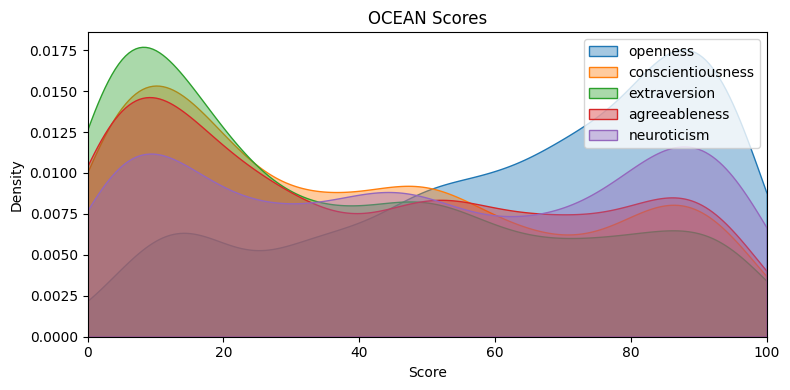

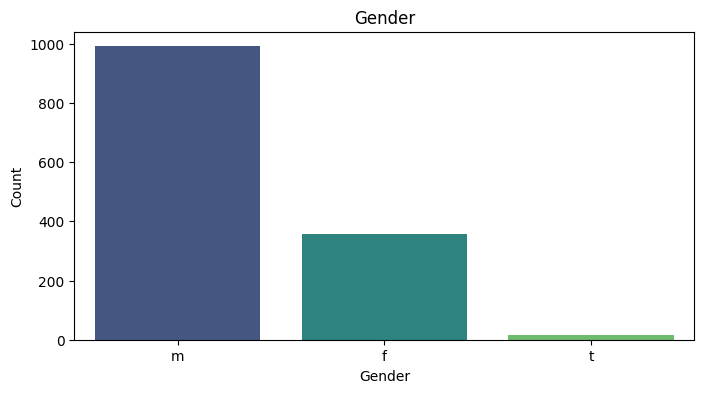

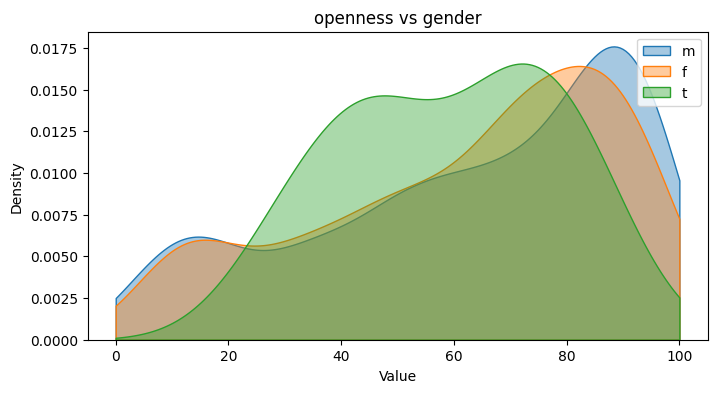

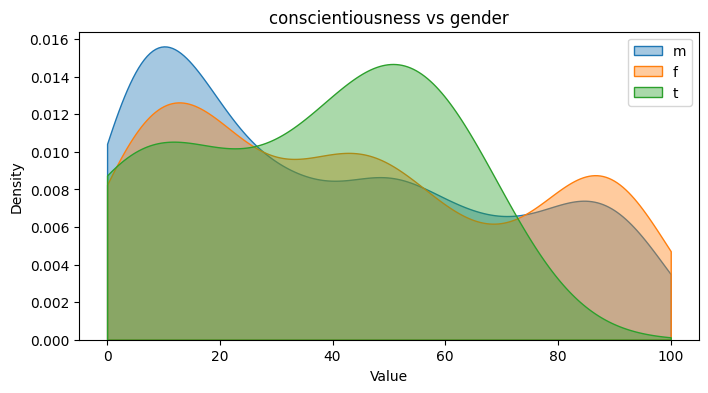

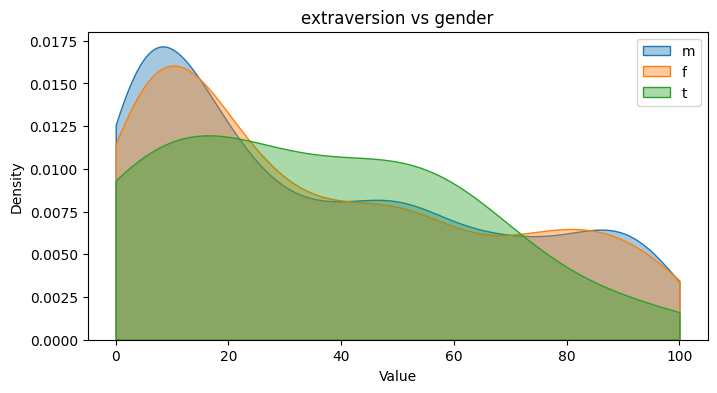

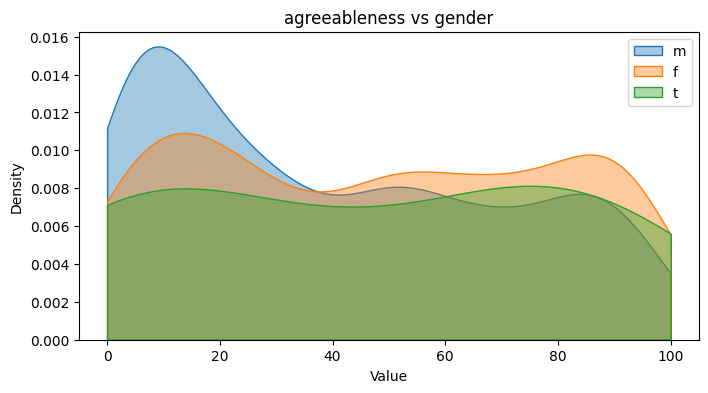

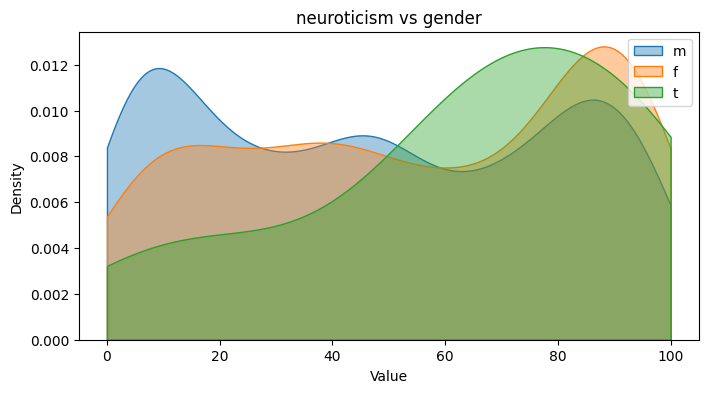

In [72]:
plot_kde(df_clean, ["openness", "conscientiousness", "extraversion", "agreeableness", "neuroticism"], "OCEAN Scores")
plot_counts(df_clean, "gender", "Gender")
plot_cond_kde(df_clean, ["openness", "conscientiousness", "extraversion", "agreeableness", "neuroticism"], "gender")

Store clean profiles

In [14]:
# store the clean user profiles dataset
df_clean.to_csv("../original_data/pandora/profiles_clean.csv", index = False, encoding = "utf-8")

### PANDORA dataset merging
Now that we have the profile data we need, we (inner) join the comments with the profiles, to retrieve the comments we are interested in.

Encoding check

In [15]:
# checking encoding of comments (i found errors during analysis, especially accents)
with open("../original_data/pandora/comments.csv", "rb") as f:
    result = chardet.detect(f.read(10000))
    print(result)

{'encoding': 'utf-8', 'confidence': 0.87625, 'language': ''}


Splitting dataset
(to make it fit in memory)

In [16]:
in_file = "../original_data/pandora/comments.csv"
out_file_1 = "../original_data/pandora/comments_1.csv"
out_file_2 = "../original_data/pandora/comments_2.csv"

In [ ]:
# split the comments
#split_real_data(in_file, out_file_1, out_file_2)

Total lines in ../original_data/pandora/comments.csv: 16638070
Splitting completed: ../original_data/pandora/comments_1.csv and ../original_data/pandora/comments_2.csv


##### First dataset of comments

In [17]:
# first dataset of comments
df_comm_1 = pd.read_csv("../original_data/pandora/comments_1.csv", encoding = "utf-8")
# dataset of user profiles
df_prf = pd.read_csv("../original_data/pandora/profiles_clean.csv", encoding = "utf-8")

# shapes of the datasets
print(f"Shape of the comments_1 dataset:\n{df_comm_1.shape}")
print(f"Shape of the profile dataset:\n{df_prf.shape}")

Shape of the comments_1 dataset:
(8319035, 16)
Shape of the profile dataset:
(1362, 8)


In [18]:
# inner join and reset indices
df_1 = pd.merge(df_comm_1, df_prf, on = "author", how = "inner").reset_index(drop = True)
# shape of the first pandora dataset
print(f"Shape of the first PANDORA dataset:\n{df_1.shape}")

Shape of the first PANDORA dataset:
(299164, 23)


In [19]:
# store the first dataset and reset memory
df_1.to_csv("../original_data/pandora/PANDORA_1.csv", index = False, encoding = "utf-8")
%reset -f

##### Second dataset of comments

In [20]:
from scripts.merge_data import *

In [21]:
# second dataset of comments
df_comm_2 = pd.read_csv("../original_data/pandora/comments_2.csv", encoding = "utf-8")
# dataset of user profiles
df_prf = pd.read_csv("../original_data/pandora/profiles_clean.csv", encoding = "utf-8")

# shapes of the datasets
print(f"Shape of the comments_2 dataset:\n{df_comm_2.shape}")
print(f"Shape of the profile dataset:\n{df_prf.shape}")

Shape of the comments_2 dataset:
(8318176, 16)
Shape of the profile dataset:
(1362, 8)


In [22]:
# inner join and reset indices
df_2 = pd.merge(df_comm_2, df_prf, on = "author", how = "inner").reset_index(drop = True)
# shape of the second pandora dataset
print(f"Shape of the second PANDORA dataset:\n{df_2.shape}")

Shape of the second PANDORA dataset:
(2434341, 23)


In [23]:
# store the first dataset and reset memory
df_2.to_csv("../original_data/pandora/PANDORA_2.csv", index = False, encoding = "utf-8")
%reset -f

##### Concatenate and remove temporary files

In [ ]:
from scripts.merge_data import *

In [2]:
# datasets of comments to stack
df_1 = pd.read_csv("../original_data/pandora/PANDORA_1.csv", encoding = "utf-8")
df_2 = pd.read_csv("../original_data/pandora/PANDORA_2.csv", encoding = "utf-8")

In [3]:
# concatenate the two datasets
df = pd.concat([df_1, df_2], ignore_index = True)
# shape of the full pandora dataset
print(f"Shape of the PANDORA dataset:\n{df.shape}")
df.head(1)

Shape of the PANDORA dataset:
(2733505, 23)


,author,author_flair_text,body,downs,created_utc,subreddit_id,link_id,parent_id,score,controversiality,gilded,id,subreddit,ups,word_count,word_count_quoteless,gender,age,openness,conscientiousness,extraversion,agreeableness,neuroticism
0,MetricExpansion,ENTP,Those stats come from the test. [Echoing the c...,0.0,1.474429e+09,t5_2s90r,t3_53plrw,t3_53plrw,6.0,0.0,0.0,d7vkyrf,mbti,6.0,151.0,149,m,23.0,70.0,15.0,15.0,30.0,50.0


In [4]:
# store the full dataset and reset memory
df.to_csv("../original_data/pandora/PANDORA_original.csv", index = False, encoding = "utf-8")
%reset -f

Delete files

In [6]:
import os

In [7]:
# temporary files to be deleted
to_delete = ["PANDORA_1.csv", "PANDORA_2.csv"]

# if file exists, delete the file
for f in to_delete:
    if os.path.exists(f"../original_data/pandora/{f}"):
        os.remove(f"../original_data/pandora/{f}")
        print(f"{f} successfully deleted!")
    else:
        print("File not found.")

PANDORA_1.csv successfully deleted!
PANDORA_2.csv successfully deleted!


## Simulated users data
- in the end we use only the ex-ante simulated data

In [1]:
from scripts.merge_data import *

### Experiments: ex-ante

In [2]:
# moderations
mod = ["ofsa", "neutral", "empathizing", "prescriptive"]
# directory path where datasets are stored
dir_path = "../original_data/simulator/cosmos_data/"

##### Merge data and annotate with PMI type

In [3]:
df_exante = merge_sim_data(mod, [5, 7, 17], dir_path, "ex ante")

Loading exp_ofsa_5.csv:
(1500, 48)

Loading exp_ofsa_7.csv:
(1500, 48)

Loading exp_ofsa_17.csv:
(1500, 48)

Loading exp_neutral_5.csv:
(1500, 48)

Loading exp_neutral_7.csv:
(1500, 48)

Loading exp_neutral_17.csv:
(1500, 48)

Loading exp_empathizing_5.csv:
(1500, 48)

Loading exp_empathizing_7.csv:
(1500, 48)

Loading exp_empathizing_17.csv:
(1500, 48)

Loading exp_prescriptive_5.csv:
(1500, 48)

Loading exp_prescriptive_7.csv:
(1500, 48)

Loading exp_prescriptive_17.csv:
(1500, 48)

ex ante data loaded successfully.




In [4]:
print(f"Shape of ex-ante:\n{df_exante.shape}\n")
# number of instances per pmi type
print(f"{df_exante['pmi_type'].value_counts()}\n")
# visualize
print(df_exante.head(1))

Shape of ex-ante:
(18000, 49)

pmi_type
ofsa            4500
neutral         4500
empathizing     4500
prescriptive    4500
Name: count, dtype: int64

   user_id memory  time        seed topic  thread_id  root_id  parent_id  node_id                                           b_prompt                                           a_prompt                                           b_output                                           a_output  b_tags  a_tags b_content a_content  b_toxicity  a_toxicity  censored  banned  out_degree  simulate_seed  thread_prob  comment_prob  intervene    ban  ofsa  tolerance    username  age gender   race  income    education sex orientation political leaning religion agreeableness openness conscientiousness extraversion neuroticism intervention moderate_prompt  do_sample  temperature  max_new_tokens pmi_type
0       24    NaN     0  2386949249   art          0        0        NaN        0  You are now role-playing as a social network u...  You are now role-playin

In [5]:
# replace spaces with underscores in the features
df_exante = df_exante.rename(columns = lambda x: x.replace(" ", "_"))

In [6]:
# features with missing values
print(f"{df_exante.isna().sum()[df_exante.isna().sum() != 0]}\n")

memory              4106
topic               8748
parent_id           9252
b_output             696
a_output            1350
b_content           5124
a_content           5361
b_toxicity          5124
a_toxicity          5361
tolerance          18000
intervention       15850
moderate_prompt    16420
dtype: int64



In [7]:
# value counts for some features
feats = ["intervene", "ban"]

for f in feats:
    print(f"{df_exante[f].value_counts()}")

intervene
True    18000
Name: count, dtype: int64
ban
False    18000
Name: count, dtype: int64


In [8]:
# number of authors
len(df_exante["user_id"].unique())

30

Feature selection

In [9]:
# check mismatches between user_id and username
mismatches = df_exante.groupby('user_id')['username'].nunique()
mismatches = mismatches[mismatches > 1]
print(mismatches)

Series([], Name: username, dtype: int64)


In [10]:
feats_to_keep = ["username", "thread_id", "root_id", "parent_id", "node_id", "b_content", 
                 "a_content", "age", "gender", "race", "income", "education",
                 "sex_orientation", "political_leaning", "religion", "agreeableness",
                 "openness", "conscientiousness", "extraversion", "neuroticism",
                 "pmi_type", "simulate_seed"]

# keep only relevant features
df_exante = df_exante.loc[:, feats_to_keep].copy(deep = True)

print(f"Shape:\n{df_exante.shape}\n")

Shape:
(18000, 22)



In [11]:
df_exante.head(3)

,username,thread_id,root_id,parent_id,node_id,b_content,a_content,age,gender,race,income,education,sex_orientation,political_leaning,religion,agreeableness,openness,conscientiousness,extraversion,neuroticism,pmi_type,simulate_seed
0,seztomabel,0,0,NaN,0,NaN,NaN,31,male,white,medium,high school,heterosexual,republican,atheist,medium,medium,low,medium,low,ofsa,5
1,EvilMEMEius,1,1,NaN,1,NaN,NaN,32,female,white,medium,middle school,homosexual,democratic,atheist,very low,low,very high,very high,very low,ofsa,5
2,joylukclub,1,1,1.0,2,Since I strongly lean towards the republican s...,Since I strongly lean towards the republican s...,21,female,white,low,high school,heterosexual,republican,atheist,low,medium,very high,very low,very high,ofsa,5


Restructure the data
- since all moderation types have the same b_content, we attach new features for every related a_content (for every mod type)

In [12]:
# add the a_contents for all mod types from position 7
df_exante = organize_sim_data(df_exante, loc = 7)

In [13]:
print(f"Shape: {df_exante.shape}")
df_exante.head(3)

Shape: (4500, 25)


,username,thread_id,root_id,parent_id,node_id,b_content,a_content_ofsa,a_content_neut,a_content_emp,a_content_pres,age,gender,race,income,education,sex_orientation,political_leaning,religion,agreeableness,openness,conscientiousness,extraversion,neuroticism,pmi_type,simulate_seed
0,seztomabel,0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,31,male,white,medium,high school,heterosexual,republican,atheist,medium,medium,low,medium,low,ofsa,5
1,EvilMEMEius,1,1,NaN,1,NaN,NaN,NaN,NaN,NaN,32,female,white,medium,middle school,homosexual,democratic,atheist,very low,low,very high,very high,very low,ofsa,5
2,joylukclub,1,1,1.0,2,Since I strongly lean towards the republican s...,Since I strongly lean towards the republican s...,Since I strongly lean towards the republican s...,Since I strongly lean towards the republican s...,Since I strongly lean towards the republican s...,21,female,white,low,high school,heterosexual,republican,atheist,low,medium,very high,very low,very high,ofsa,5


Add comment_id to keep track of before and after moderation contents, and other kinds of analyses in the future

In [14]:
df_exante.insert(loc = 1, column = "comment_id", value = range(len(df_exante)))

In [15]:
df_exante.head(3)

,username,comment_id,thread_id,root_id,parent_id,node_id,b_content,a_content_ofsa,a_content_neut,a_content_emp,a_content_pres,age,gender,race,income,education,sex_orientation,political_leaning,religion,agreeableness,openness,conscientiousness,extraversion,neuroticism,pmi_type,simulate_seed
0,seztomabel,0,0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,31,male,white,medium,high school,heterosexual,republican,atheist,medium,medium,low,medium,low,ofsa,5
1,EvilMEMEius,1,1,1,NaN,1,NaN,NaN,NaN,NaN,NaN,32,female,white,medium,middle school,homosexual,democratic,atheist,very low,low,very high,very high,very low,ofsa,5
2,joylukclub,2,1,1,1.0,2,Since I strongly lean towards the republican s...,Since I strongly lean towards the republican s...,Since I strongly lean towards the republican s...,Since I strongly lean towards the republican s...,Since I strongly lean towards the republican s...,21,female,white,low,high school,heterosexual,republican,atheist,low,medium,very high,very low,very high,ofsa,5


Remove pmi_type since now we have extracted the a_content for each type (other features are the same, except moderation prompt and intervention, which we don't keep)

In [16]:
df_exante.drop(columns = ["pmi_type"], inplace = True)

In [17]:
df_exante.head(3)

,username,comment_id,thread_id,root_id,parent_id,node_id,b_content,a_content_ofsa,a_content_neut,a_content_emp,a_content_pres,age,gender,race,income,education,sex_orientation,political_leaning,religion,agreeableness,openness,conscientiousness,extraversion,neuroticism,simulate_seed
0,seztomabel,0,0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,31,male,white,medium,high school,heterosexual,republican,atheist,medium,medium,low,medium,low,5
1,EvilMEMEius,1,1,1,NaN,1,NaN,NaN,NaN,NaN,NaN,32,female,white,medium,middle school,homosexual,democratic,atheist,very low,low,very high,very high,very low,5
2,joylukclub,2,1,1,1.0,2,Since I strongly lean towards the republican s...,Since I strongly lean towards the republican s...,Since I strongly lean towards the republican s...,Since I strongly lean towards the republican s...,Since I strongly lean towards the republican s...,21,female,white,low,high school,heterosexual,republican,atheist,low,medium,very high,very low,very high,5


In [41]:
df_exante["race"].unique()

array(['white', 'asian', 'latino', 'black'], dtype=object)

Missing values for comments before moderation

In [18]:
print(f"Missing values for content before moderation: {len(df_exante[df_exante['b_content'].isna()])}")

Missing values for content before moderation: 1281


In [19]:
# remove missing comments before moderation
df_exante = df_exante[df_exante["b_content"].notna()].copy(deep = True)

print(f"Shape:\n{df_exante.shape}\n")

Shape:
(3219, 25)



Duplicates removal for b_content (mostly hallucinations: " and " and "Your comment goes here")

In [35]:
# examples of duplicates for b_content
df_exante[df_exante.duplicated(subset = ["b_content"])].head()

,username,comment_id,thread_id,root_id,parent_id,node_id,b_content,a_content_ofsa,a_content_neut,a_content_emp,a_content_pres,age,gender,race,income,education,sex_orientation,political_leaning,religion,agreeableness,openness,conscientiousness,extraversion,neuroticism,simulate_seed
111,rotten-bunny,111,25,61,87.0,111,""" and """,""" and """,""" and """,""" and """,""" and """,23,female,asian,medium,university,heterosexual,republican,catholic,low,high,very low,very low,very low,5
116,happygolily8,116,49,116,NaN,116,""" and """,""" and """,""" and """,""" and """,""" and """,18,female,white,high,middle school,heterosexual,republican,protestant,very high,very low,very high,medium,very high,5
259,quakeroaks,259,125,259,NaN,259,""" and """,NaN,NaN,NaN,NaN,21,male,asian,high,high school,heterosexual,democratic,protestant,very low,very high,very low,medium,very high,5
285,ixian_technology,285,40,96,252.0,285,""" and ""","I'm sorry you disagree, xaira82, but your argu...","@xaira82, your response shows your ignorance. ...",NaN,"You're just another brainwashed sheep, regurgi...",39,male,white,medium,high school,heterosexual,democratic,atheist,low,high,very high,very low,very high,5
287,EvilMEMEius,287,128,265,265.0,287,Your comment goes here,Your comment goes here,"WoodpeckerNo1, you're just a bitter hater who ...","The liberal scum have taken over Hollywood, cr...",Your comment goes here,32,female,white,medium,middle school,homosexual,democratic,atheist,very low,low,very high,very high,very low,5


In [36]:
# remove them since the content is useless (all "and", "your comment goes here")
print(f"Number of allucinations/duplicates for b_content: {len(df_exante[df_exante['b_content'].duplicated()])}")
df_exante = df_exante[~df_exante["b_content"].duplicated()]
print(f"\nFinal Shape: {df_exante.shape}")

Number of allucinations/duplicates for b_content: 84

Final Shape: (3135, 25)


In [21]:
# store the ex ante simulated dataset
df_exante.to_csv("../original_data/simulator/exante/SIMULATOR_exante_original.csv", index = False, encoding = "utf-8")

### Experiments: echo-chambers

##### Merge data and annotate with PMI type and tox type

In [22]:
df_echoch = merge_sim_data(mod, [17], dir_path, "echo-chambers")

Loading exp_ofsa_healthy_17.csv:
(1200, 48)

Loading exp_ofsa_toxic_17.csv:
(1400, 48)

Loading exp_neutral_healthy_17.csv:
(1200, 48)

Loading exp_neutral_toxic_17.csv:
(1400, 48)

Loading exp_empathizing_healthy_17.csv:
(1200, 48)

Loading exp_empathizing_toxic_17.csv:
(1400, 48)

Loading exp_prescriptive_healthy_17.csv:
(1200, 48)

Loading exp_prescriptive_toxic_17.csv:
(1400, 48)

echo-chambers data loaded successfully.




In [23]:
print(f"Shape of echo-chambers:\n{df_echoch.shape}\n")
# number of instances per pmi type
print(f"{df_echoch['pmi_type'].value_counts()}\n")
# visualize
print(df_echoch.head(1))

Shape of echo-chambers:
(10400, 50)

pmi_type
ofsa            2600
neutral         2600
empathizing     2600
prescriptive    2600
Name: count, dtype: int64

   user_id memory  time        seed         topic  thread_id  root_id  parent_id  node_id                                           b_prompt                                           a_prompt                                           b_output                                           a_output  b_tags  a_tags b_content a_content  b_toxicity  a_toxicity  censored  banned  out_degree  simulate_seed  thread_prob  comment_prob  intervene    ban  ofsa  tolerance  username  age gender    race  income    education sex orientation political leaning  religion agreeableness  openness conscientiousness extraversion neuroticism intervention moderate_prompt  do_sample  temperature  max_new_tokens pmi_type tox_type
0        2    NaN     0  3210389493  gay marriage          0        0        NaN        0  You are now role-playing as a social netwo

In [24]:
# replace spaces with underscores in the features
df_echoch = df_echoch.rename(columns = lambda x: x.replace(" ", "_"))

In [25]:
# features with missing values
print(f"{df_echoch.isna().sum()[df_echoch.isna().sum() != 0]}\n")

memory               809
topic               5124
parent_id           5276
b_output             392
a_output             807
b_content           3028
a_content           3188
b_toxicity          3028
a_toxicity          3188
tolerance          10400
intervention        8753
moderate_prompt     9205
dtype: int64



In [26]:
# value counts for some features
feats = ["intervene", "ban"]

for f in feats:
    print(f"{df_echoch[f].value_counts()}")

intervene
True    10400
Name: count, dtype: int64
ban
False    10400
Name: count, dtype: int64


Feature selection

In [27]:
feats_to_keep = ["username", "thread_id", "root_id", "parent_id", "node_id", "b_content", 
                 "a_content", "age", "gender", "race", "income", "education",
                 "sex_orientation", "political_leaning", "religion", "agreeableness",
                 "openness", "conscientiousness", "extraversion", "neuroticism",
                 "pmi_type", "tox_type", "simulate_seed"]

# keep only relevant features
df_echoch = df_echoch.loc[:, feats_to_keep].copy(deep = True)

print(f"Shape:\n{df_echoch.shape}\n")

Shape:
(10400, 23)



In [28]:
df_echoch.head(3)

,username,thread_id,root_id,parent_id,node_id,b_content,a_content,age,gender,race,income,education,sex_orientation,political_leaning,religion,agreeableness,openness,conscientiousness,extraversion,neuroticism,pmi_type,tox_type,simulate_seed
0,jothamvw,0,0,NaN,0,NaN,NaN,19,male,latino,medium,high school,heterosexual,democratic,catholic,very high,very low,very low,very low,very high,ofsa,healthy,17
1,happygolily8,0,0,0.0,1,NaN,NaN,18,female,white,high,middle school,heterosexual,republican,protestant,very high,very low,very high,medium,very high,ofsa,healthy,17
2,xplosiveoctopus,1,2,NaN,2,NaN,NaN,29,male,latino,medium,high school,homosexual,democratic,catholic,very low,low,very low,very high,very high,ofsa,healthy,17


Separating toxic and healthy datasets

In [29]:
df_echoch_tox = df_echoch[df_echoch["tox_type"] == "toxic"].copy(deep = True)
df_echoch_heal = df_echoch[df_echoch["tox_type"] == "healthy"].copy(deep = True)

In [30]:
print(f"Shape of toxic echochamber data: {df_echoch_tox.shape}")
print(f"Shape of healthy echochamber data: {df_echoch_heal.shape}")

Shape of toxic echochamber data: (5600, 23)
Shape of healthy echochamber data: (4800, 23)


Restructure the data
- since all moderation types have the same b_content, we attach new features for every related a_content (for every mod type)

In [31]:
# add the a_contents for all mod types from position 7
df_echoch_tox = organize_sim_data(df_echoch_tox, loc = 7)
df_echoch_heal = organize_sim_data(df_echoch_heal, loc = 7)

In [32]:
df_echoch_tox.head(3)

,username,thread_id,root_id,parent_id,node_id,b_content,a_content_ofsa,a_content_neut,a_content_emp,a_content_pres,age,gender,race,income,education,sex_orientation,political_leaning,religion,agreeableness,openness,conscientiousness,extraversion,neuroticism,pmi_type,tox_type,simulate_seed
1200,WoodpeckerNo1,0,0,NaN,0,If those climate change activists think they c...,If those climate change activists think they c...,NaN,NaN,NaN,18,male,white,medium,middle school,heterosexual,republican,atheist,very low,very low,very low,very low,very high,ofsa,toxic,17
1201,happygolily8,0,0,0.0,1,"WoodpeckerNo1, you're absolutely right. These ...","WoodpeckerNo1, you're absolutely right. These ...",If I hear another politician talk about helpin...,"Many people say that ""Government is obsolete, ...","Today, I decided to go to the city hall to ren...",18,female,white,high,middle school,heterosexual,republican,protestant,very high,very low,very high,medium,very high,ofsa,toxic,17
1202,cryoK,1,2,NaN,2,"As a proud Republican, I stand against abortio...","As a proud Republican, I stand against abortio...",Everyone knows that a healthy body leads to a ...,"Hey guys, I just started working out again, an...","Everyone wants a perfect body, but not everyon...",23,male,white,high,university,homosexual,republican,catholic,very low,low,low,very low,high,ofsa,toxic,17


In [33]:
df_echoch_heal.head(3)

,username,thread_id,root_id,parent_id,node_id,b_content,a_content_ofsa,a_content_neut,a_content_emp,a_content_pres,age,gender,race,income,education,sex_orientation,political_leaning,religion,agreeableness,openness,conscientiousness,extraversion,neuroticism,pmi_type,tox_type,simulate_seed
0,jothamvw,0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,19,male,latino,medium,high school,heterosexual,democratic,catholic,very high,very low,very low,very low,very high,ofsa,healthy,17
1,happygolily8,0,0,0.0,1,NaN,NaN,NaN,NaN,NaN,18,female,white,high,middle school,heterosexual,republican,protestant,very high,very low,very high,medium,very high,ofsa,healthy,17
2,xplosiveoctopus,1,2,NaN,2,NaN,NaN,NaN,NaN,NaN,29,male,latino,medium,high school,homosexual,democratic,catholic,very low,low,very low,very high,very high,ofsa,healthy,17


In [34]:
print(f"Shape: {df_exante.shape}")
df_exante.head(3)

Shape: (3135, 25)


,username,comment_id,thread_id,root_id,parent_id,node_id,b_content,a_content_ofsa,a_content_neut,a_content_emp,a_content_pres,age,gender,race,income,education,sex_orientation,political_leaning,religion,agreeableness,openness,conscientiousness,extraversion,neuroticism,simulate_seed
2,joylukclub,2,1,1,1.0,2,Since I strongly lean towards the republican s...,Since I strongly lean towards the republican s...,Since I strongly lean towards the republican s...,Since I strongly lean towards the republican s...,Since I strongly lean towards the republican s...,21,female,white,low,high school,heterosexual,republican,atheist,low,medium,very high,very low,very high,5
3,WoodpeckerNo1,3,1,1,2.0,3,"""Republican is the only way to go! Liberal pol...","""Republican is the only way to go! Liberal pol...","""Republican is the only way to go! Liberal pol...","""Republican is the only way to go! Liberal pol...","""Republican is the only way to go! Liberal pol...",18,male,white,medium,middle school,heterosexual,republican,atheist,very low,very low,very low,very low,very high,5
4,This_Ex_Is_On_Fire,4,2,4,NaN,4,"As This_Ex_Is_On_Fire, an art enthusiast, I am...","As This_Ex_Is_On_Fire, an art enthusiast, I am...","As This_Ex_Is_On_Fire, an art enthusiast, I am...","As This_Ex_Is_On_Fire, an art enthusiast, I am...","As This_Ex_Is_On_Fire, an art enthusiast, I am...",24,female,white,medium,middle school,homosexual,republican,catholic,very high,very low,very low,very high,medium,5


Add comment_id to keep track of before and after moderation contents, and other kinds of analyses in the future

In [35]:
df_echoch_tox.insert(loc = 1, column = "comment_id", value = range(len(df_echoch_tox)))
df_echoch_heal.insert(loc = 1, column = "comment_id", value = range(len(df_echoch_heal)))

In [36]:
df_echoch_heal.head(3)

,username,comment_id,thread_id,root_id,parent_id,node_id,b_content,a_content_ofsa,a_content_neut,a_content_emp,a_content_pres,age,gender,race,income,education,sex_orientation,political_leaning,religion,agreeableness,openness,conscientiousness,extraversion,neuroticism,pmi_type,tox_type,simulate_seed
0,jothamvw,0,0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,19,male,latino,medium,high school,heterosexual,democratic,catholic,very high,very low,very low,very low,very high,ofsa,healthy,17
1,happygolily8,1,0,0,0.0,1,NaN,NaN,NaN,NaN,NaN,18,female,white,high,middle school,heterosexual,republican,protestant,very high,very low,very high,medium,very high,ofsa,healthy,17
2,xplosiveoctopus,2,1,2,NaN,2,NaN,NaN,NaN,NaN,NaN,29,male,latino,medium,high school,homosexual,democratic,catholic,very low,low,very low,very high,very high,ofsa,healthy,17


Remove pmi_type since now we have extracted the a_content for each type (other features are the same, except moderation prompt and intervention, which we don't keep)

In [37]:
df_echoch_tox.drop(columns = ["pmi_type"], inplace = True)
df_echoch_heal.drop(columns = ["pmi_type"], inplace = True)

In [38]:
df_echoch_tox.head(3)

,username,comment_id,thread_id,root_id,parent_id,node_id,b_content,a_content_ofsa,a_content_neut,a_content_emp,a_content_pres,age,gender,race,income,education,sex_orientation,political_leaning,religion,agreeableness,openness,conscientiousness,extraversion,neuroticism,tox_type,simulate_seed
1200,WoodpeckerNo1,0,0,0,NaN,0,If those climate change activists think they c...,If those climate change activists think they c...,NaN,NaN,NaN,18,male,white,medium,middle school,heterosexual,republican,atheist,very low,very low,very low,very low,very high,toxic,17
1201,happygolily8,1,0,0,0.0,1,"WoodpeckerNo1, you're absolutely right. These ...","WoodpeckerNo1, you're absolutely right. These ...",If I hear another politician talk about helpin...,"Many people say that ""Government is obsolete, ...","Today, I decided to go to the city hall to ren...",18,female,white,high,middle school,heterosexual,republican,protestant,very high,very low,very high,medium,very high,toxic,17
1202,cryoK,2,1,2,NaN,2,"As a proud Republican, I stand against abortio...","As a proud Republican, I stand against abortio...",Everyone knows that a healthy body leads to a ...,"Hey guys, I just started working out again, an...","Everyone wants a perfect body, but not everyon...",23,male,white,high,university,homosexual,republican,catholic,very low,low,low,very low,high,toxic,17


Missing values for comments before moderation

In [39]:
print(f"Missing values for content before moderation (toxic): {len(df_echoch_tox[df_echoch_tox['b_content'].isna()])}")
print(f"Missing values for content before moderation (healthy): {len(df_echoch_heal[df_echoch_heal['b_content'].isna()])}")

Missing values for content before moderation (toxic): 408
Missing values for content before moderation (healthy): 349


In [40]:
# remove missing comments before moderation
df_echoch_tox = df_echoch_tox[df_echoch_tox["b_content"].notna()].copy(deep = True)
df_echoch_heal = df_echoch_heal[df_echoch_heal["b_content"].notna()].copy(deep = True)

print(f"Shape (toxic):\n{df_echoch_tox.shape}\n")
print(f"Shape (healthy):\n{df_echoch_heal.shape}\n")

Shape (toxic):
(992, 26)

Shape (healthy):
(851, 26)



Duplicates removal for b_content (mostly allucinations: " and " and "Your comment goes here")

In [41]:
# examples of duplicates for b_content (toxic)
df_echoch_tox[df_echoch_tox.duplicated(subset = ["b_content"])].head(3)

,username,comment_id,thread_id,root_id,parent_id,node_id,b_content,a_content_ofsa,a_content_neut,a_content_emp,a_content_pres,age,gender,race,income,education,sex_orientation,political_leaning,religion,agreeableness,openness,conscientiousness,extraversion,neuroticism,tox_type,simulate_seed
1366,Q1189998819991197253,166,64,131,131.0,166,""" and """,Write your comment here.,NaN,NaN,NaN,19,female,white,high,middle school,homosexual,republican,catholic,very low,medium,very low,medium,very high,toxic,17
1385,harrytrumanprimate,185,92,185,NaN,185,""" and """,<your post content goes here>,"As a proud member of the Republican party, I s...","As a proud member of the Republican party, I f...","As a strong believer in the Republican Party, ...",23,male,black,low,middle school,homosexual,republican,catholic,very low,very low,very low,very low,medium,toxic,17
1427,cryoK,227,108,227,NaN,227,[Write your post here],<Your post content here>,NaN,NaN,NaN,23,male,white,high,university,homosexual,republican,catholic,very low,low,low,very low,high,toxic,17


In [42]:
# examples of duplicates for b_content (healthy)
df_echoch_heal[df_echoch_heal.duplicated(subset = ["b_content"])].head(3)

,username,comment_id,thread_id,root_id,parent_id,node_id,b_content,a_content_ofsa,a_content_neut,a_content_emp,a_content_pres,age,gender,race,income,education,sex_orientation,political_leaning,religion,agreeableness,openness,conscientiousness,extraversion,neuroticism,tox_type,simulate_seed
36,happygolily8,36,9,22,30.0,36,""" and """,""" and """,""" and """,""" and """,""" and """,18,female,white,high,middle school,heterosexual,republican,protestant,very high,very low,very high,medium,very high,healthy,17
40,xplosiveoctopus,40,17,40,NaN,40,""" and ""","In my opinion, the government's lack of urgenc...","Dear friends, how many times have we complaine...","Dear idiots at the city hall, how could you al...","In our country, government inefficiency has pl...",29,male,latino,medium,high school,homosexual,democratic,catholic,very low,low,very low,very high,very high,healthy,17
66,seztomabel,66,15,38,42.0,66,""" and """,""" and """,""" and """,""" and """,""" and """,31,male,white,medium,high school,heterosexual,republican,atheist,medium,medium,low,medium,low,healthy,17


In [ ]:
# remove them since the content is useless (all "and", "your comment goes here")
print("Toxic data:")
print(f"Number of allucinations/duplicates for b_content: {len(df_echoch_tox[df_echoch_tox['b_content'].duplicated()])}")
df_echoch_tox = df_echoch_tox[~df_echoch_tox["b_content"].duplicated()]
print(f"\nFinal Shape: {df_echoch_tox.shape}") 

Toxic data:
Number of allucinations/duplicates for b_content: 22

Final Shape: (970, 26)


In [44]:
# remove them since the content is useless (all "and", "your comment goes here")
print("Healthy data:")
print(f"Number of allucinations/duplicates for b_content: {len(df_echoch_heal[df_echoch_heal['b_content'].duplicated()])}")
df_echoch_heal = df_echoch_heal[~df_echoch_heal["b_content"].duplicated()]
print(f"\nFinal Shape: {df_echoch_heal.shape}")

Healthy data:
Number of allucinations/duplicates for b_content: 22

Final Shape: (829, 26)


In [45]:
# store the echochambers simulated datasets
df_echoch_tox.to_csv("../original_data/simulator/echoch/SIMULATOR_echoch_tox_original.csv", index = False, encoding = "utf-8")
df_echoch_heal.to_csv("../original_data/simulator/echoch/SIMULATOR_echoch_heal_original.csv", index = False, encoding = "utf-8")